<a href="https://colab.research.google.com/github/tjy2202/Personal_training/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_on_skitit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I.사이킷런(scikit-learn)


* 다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리
* 심플하고 일관성 있는 API, 유용한 온라인 문서, 풍부한 예제
* 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공
* 다양한 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공
* 많은 사람들이 사용하며 다양한 환경에서 검증된 라이브러리

### 0.모듈


| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

In [ ]:
============================================================================================================
# sklearn.preprocessing : 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등)
from sklearn.preprocessing import StandardScaler, MinMaxScaler #전처리 (표준화, 정규화)
============================================================================================================
# sklearn.model_selection : 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
from sklearn.model_selection import train_test_split #model_selection 모듈
from sklearn.model_selection import cross_val_score #교차검증
                                    cross_validate  #교차검증 + 모델 예측 시간

from sklearn.model_selection import GridSearchCV #교차 검증 및 최적 하이퍼 파라미터 찾기

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs = multiprocessing.cpu_count(), # 병렬 처리(?) cpu 갯수만큼, -1이면 모든 코어 사용
    cv=5, #cross_validation
    verbose=True 
#verbose : Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
)

============================================================================================================
### sklearn.metrics
### => 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등)

model.score(X_test,y_test) #score는 정확도를 나타냄

from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import confusion_matrix #오차행렬

from sklearn.metrics import precision_score, recall_score #정밀도, 재현율

from sklearn.metrics import f1_score #f1-score(정밀도와 재현율을 결합한 지표)

from sklearn.metrics import roc_curve, roc_auc_score # ROC곡선 FPR(1-sensitivity)가 변할때 TPR(Recall)이 변하는 곡선
pred_proba_class1 = model.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
plt.plot(fprs,tprs,label='ROC')
plt.plot([0,1],[0,1],'--k',label='Random')
plt.xlim(0,1), plt.ylim(0,1)
plt.legend();

roc_auc = roc_auc_score(y_test,predict) #ROC 그래프 Score

import metrics
metrics.accuracy_score(y_train, predict)
metrics.f1_score(y_train, predict, average=None)
============================================================================================================
# sklearn.pipeline : 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공
from sklearn.pipeline import make_pipeline, Pipeline

estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

pipe = Pipeline([('scaler',StandardScaler()),
                 ('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator=pipe, # or estimator
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5, verbose=True)

gs.fit(X,y)
gs.best_estimator_ #최적 파라미터
============================================================================================================
import multiprocessing

param_grid = [{'penalty':['l1','l2'],
                'C' : [1.5,2.0,2.5,3.5,4.0]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring = 'accuracy', cv=10, n_jobs = multiprocessing.cpu_count())

============================================================================================================

In [ ]:
from itertools import product #효율적인 루핑을 위한 이터레이터를 만드는 함수
for a in zip(product([0,1],[0,1])): # product(A, B) = ((x,y) for x in A for y in B) 데카르트 곱
  print(a)

((0, 0),)
((0, 1),)
((1, 0),)
((1, 1),)


### 1.벡터화
* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

#### ㄱ.CountVectorizer
* 문서에 나온 단어의 수를 세서 벡터 생성

In [ ]:
count_vectorizer = CountVectorizer()

In [ ]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

데이터를 희소 행렬 형태로 표현

In [ ]:
X_train_count

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in X_train_count[0]:
  print(v)

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


#### ㄴ.HashingVectorizer
* 각 단어를 해쉬 값으로 표현
* 미리 정해진 크기의 벡터로 표현

In [ ]:
hash_vectorizer = HashingVectorizer(n_features=1000)

In [ ]:
X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)

In [ ]:
X_train_hash

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1550687 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_hash[0])

  (0, 80)	-0.0642824346533225
  (0, 108)	0.0642824346533225
  (0, 111)	-0.128564869306645
  (0, 145)	0.0642824346533225
  (0, 158)	0.0642824346533225
  (0, 159)	-0.0642824346533225
  (0, 161)	0.0642824346533225
  (0, 165)	-0.0642824346533225
  (0, 171)	0.0642824346533225
  (0, 182)	0.0642824346533225
  (0, 195)	-0.0642824346533225
  (0, 196)	0.19284730395996752
  (0, 205)	-0.0642824346533225
  (0, 209)	0.0642824346533225
  (0, 234)	0.0642824346533225
  (0, 237)	0.0642824346533225
  (0, 248)	0.0642824346533225
  (0, 265)	0.19284730395996752
  (0, 274)	0.0642824346533225
  (0, 277)	0.19284730395996752
  (0, 284)	-0.0642824346533225
  (0, 286)	-0.0642824346533225
  (0, 296)	0.0642824346533225
  (0, 362)	-0.0642824346533225
  (0, 364)	-0.0642824346533225
  :	:
  (0, 739)	0.0
  (0, 761)	-0.0642824346533225
  (0, 766)	0.0642824346533225
  (0, 800)	-0.0642824346533225
  (0, 812)	-0.0642824346533225
  (0, 842)	0.0642824346533225
  (0, 848)	-0.0642824346533225
  (0, 851)	0.0642824346533225
  (0

#### ㄷ.TfidfVectorizer
* 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
* 각 빈도는 일반적으로 로그 스케일링 후 사용
* $tf(t, d) = log(f(t, d) + 1)$
* $idf(t, D) = \frac{|D|}{|d \in D : t \in d| + 1}$
* $tfidf(t, d, D) = tf(t, d) \times idf(t, D)$

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in X_train_tfidf[0]:
  print(v)

  (0, 86580)	0.13157118714240987
  (0, 128420)	0.04278499079283093
  (0, 35983)	0.03770448563619875
  (0, 35187)	0.09353930598317124
  (0, 66098)	0.09785515708314481
  (0, 114428)	0.05511105154696676
  (0, 78955)	0.05989856888061599
  (0, 94362)	0.055457031390147224
  (0, 76722)	0.06908779999621749
  (0, 57308)	0.1558717009157704
  (0, 62221)	0.02921527992427867
  (0, 128402)	0.05922294083277842
  (0, 67156)	0.07313443922740179
  (0, 123989)	0.08207027465330353
  (0, 90252)	0.031889368795417566
  (0, 63363)	0.08342748387969037
  (0, 78784)	0.0633940918806495
  (0, 96144)	0.10826904490745741
  (0, 128026)	0.060622095889758885
  (0, 109271)	0.10844724822064673
  (0, 51730)	0.09714744057976722
  (0, 86001)	0.07000411445838192
  (0, 83256)	0.08844382496462173
  (0, 113986)	0.17691750674853082
  (0, 37565)	0.03431760442478462
  :	:
  (0, 4605)	0.06332603952480323
  (0, 76032)	0.019219463052223086
  (0, 92081)	0.09913274493911223
  (0, 40998)	0.0780136819691811
  (0, 79666)	0.109364012524142

## II.Estimator(model) `API(Application Program Interface)`

* 일관성: 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스 공유
* 검사(inspection): 모든 지정된 파라미터 값은 공개 속성으로 노출
* 제한된 객체 계층 구조
  + 알고리즘만 파이썬 클래스에 의해 표현
  + 데이터 세트는 표준 포맷(NumPy 배열, Pandas DataFrame, Scipy 희소 행렬)으로 표현
  + 매개변수명은 표준 파이썬 문자열 사용
* 구성: 많은 머신러닝 작업은 기본 알고리즘의 시퀀스로 나타낼 수 있으며, Scikit-Learn은 가능한 곳이라면 어디서든 이 방식을 사용
* 합리적인 기본값: 모델이 사용자 지정 파라미터를 필요로 할 때 라이브러리가 적절한 기본값을 정의

![scikit-learn](https://scikit-learn.org/stable/_static/ml_map.png)



### 0.API 사용 방법



1. Scikit-Learn으로부터 적절한 `estimator` 클래스를 임포트해서 모델의 클래스 선택
2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
3. 데이터를 특징 배열과 대상 벡터로 배치
4. 모델 인스턴스의 `fit()` 메서드를 호출해 모델을 데이터에 적합
5. 모델을 새 데이터에 대해서 적용
  + 지도 학습: 대체로 `predict()` 메서드를 사용해 알려지지 않은 데이터에 대한 레이블 예측
  + 비지도 학습: 대체로 `transform()`이나 `predict()` 메서드를 사용해 데이터의 속성을 변환하거나 추론

In [ ]:
#1. 적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
#2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
#3. 데이터를 특징 배열과 대상 벡터로 배치
#4. 모델 인스턴스의 `fit()` 메서드를 호출해 모델을 데이터에 적합
#5. 모델을 새 데이터에 대해서 적용

### 1.선형모델

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

#### ㄱ. 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [ ]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')
print('R2 scores: {}'.format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scores std: {}'.format(r2_scores.std()))

R2 scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean: 0.20252899006056363
R2 scores std: 0.5952960169512287


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [ ]:
print('y = ' + str(model.intercept_) + ' ')
for i,c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = 31.877774082806738 
-0.10005190116205806 * x0
0.039748734073766195 * x1
0.032852970354289385 * x2
3.1297048910689624 * x3
-16.26230871476075 * x4
4.262632848962446 * x5
-0.0066221737225279015 * x6
-1.3474246052793588 * x7
0.26033756426500326 * x8
-0.010985425248211065 * x9
-0.9602319108726168 * x10
0.010474497247930101 * x11
-0.4978934426925274 * x12


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 scores: {}'.format(r2))

RMSE: 0.7228855553739709
R2 scores: 0.6050636949291786


#### ㄴ.릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.2)
model.fit(X_train,y_train)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

#### ㄷ.라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

#### ㄹ.신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

#### ㅁ.직교 정합 추구 (Orthogonal Matchin Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [ ]:
model = OrthogonalMatchingPursuit(tol=1.0)
model.fit(X_train,y_train)

#### ㅂ.다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능



![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

#### 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly

### 2.로지스틱 회귀 (Logistic Regression)

* 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

In [ ]:
from sklearn.linear_model import LogisticRegression

#### ㄱ.확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

In [ ]:
from sklearn.linear_model import SGDRegressor, SGDClassifier

model = SGDRegressor(loss='squared_loss') #SGD회귀
model = SGDClassifier(loss='log') #SGD분류
model.fit(X_train,y_train)

### 3.서포트 벡터 머신(Support Vector Machines)

* SVM은 **입력 데이터가 정규화 되어야 좋은 성능**을 보임
* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행


![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [ ]:
from sklearn.svm import SVR # SVM을 이용한 회귀 모델
from sklearn.svm import SVC # SVM을 이용한 분류 모델
from sklearn.pipeline import make_pipeline, Pipeline

#SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임 [0,1] 범위
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### ㄱ.커널 기법 : 비선형으로 변환

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [ ]:
linear_svr = SVR(kernel='linear')
polynomial_svr = SVR(kernel='poly')
rbf_svr = SVR(kernel='rbf')

linear_svc = SVC(kernel='linear')
polynomial_svc = SVC(kernel='poly')
rbf_svc = SVC(kernel='rbf')

#### ㄴ.매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
polynomial_svc = SVC(kernel='poly', degree=2, C=0.1, gamma='auto')
rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')

In [ ]:
from sklearn.manifold import TSNE
X_comp = TSNE(n_components=1).fit_transform(X) #고차원 -> 저차원 변환 
plt.scatter(X_comp,y);

#### (***)이해 필요 : SVM 시각화

In [ ]:
import numpy as np
a = np.arange(-10,10,1)
X,Y =np.meshgrid(a,a)
print('a : ',a)
print('X : ',len(X))
print('Y : ',Y)


In [6]:
import numpy as np

def make_meshgrid(x,y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  #meshgrid => 1차원 좌표 배열에서 N차원 직사각형 격자
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h), 
                       np.arange(y_min, y_max, h)) 
  # => x축은 x의 최소값에서 최대값까지 0.02간격으로 만들고 y축도 같게 만든 2차원 배열
  return xx, yy

In [7]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]) # 2차원배열에서 각 영역의 예측값 #xx.ravel() xx를 1차원으로 변환, 
#np.c_[a,b] => a,b의 인자들을 묶기
#a = [1,2,3], b = [4,5,6], np.c_[a,b] => [[1,4],[2,5],[3,6]]
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params) #contourf 등치선 : 공간상에 분포하는 동일한 값을 가지는 인접한 지점을 연속적으로 이어 구성한 선

  return out

In [10]:
X_comp = TSNE(n_components=2).fit_transform(X) #입력 변수를 2개로 차원 축소
X0, X1 = X_comp[:,0],X_comp[:,1] #입력변수0 과 1
xx, yy = make_meshgrid(X0,X1)

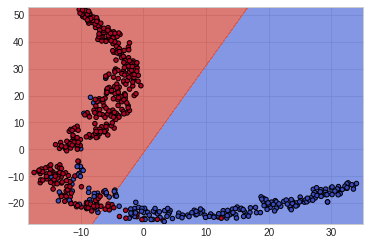

In [ ]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [24]:
X0.max() #-32 ~23

23.010433

In [20]:
xx

array([[-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658],
       [-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658],
       [-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658],
       ...,
       [-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658],
       [-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658],
       [-33.39753342, -33.37753342, -33.35753342, ...,  23.96246658,
         23.98246658,  24.00246658]])

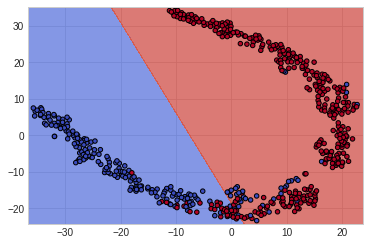

In [9]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

def make_meshgrid(x,y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0],X_comp[:,1]
xx, yy = make_meshgrid(X0,X1)

model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 4.최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
param_grid = [{'model__n_neighbors':[3,5,7],
               'model__weights': ['uniform','distance'],
               'model__algorithm': ['ball_tree','ke_tree','brute']}]

### 5.나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기(텍스트 데이터)
  * 다항 나이브 베이즈 분류기(텍스트 데이터)

나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과

\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#### ㄱ.가우시안 나이브 베이즈

* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(covtype_X_train_scale, covtype_y_train)

#### ㄴ.베르누이 나이브 베이즈

* 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는 다고 가정

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train_count, y_train)

#### ㄷ.다항 나이브 베이즈

* 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

### 6.결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#### ㄱ.분류 - `DecisionTreeClassifier()`

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

#### ㄴ.회귀 - `DecisionTreeRegressor()`

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = tree.DecisionTreeRegressor()
model = model.fit(X,y)

#### ㄷ.Tree 시각화

##### 텍스트를 통한 시각화

In [ ]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

##### plot_tree를 사용한 시각화

In [ ]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=iris.feature_names, # column names
                                class_names=iris.target_names, # y값 names
                                filled=True, rounded= True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

##### DecisionTreeClassifier 결정경계 시각화

In [30]:
n_classes=3
plot_colors = 'ryb'
plot_step = 0.02

(0.0, 7.88, -0.9, 3.4800000000000044)

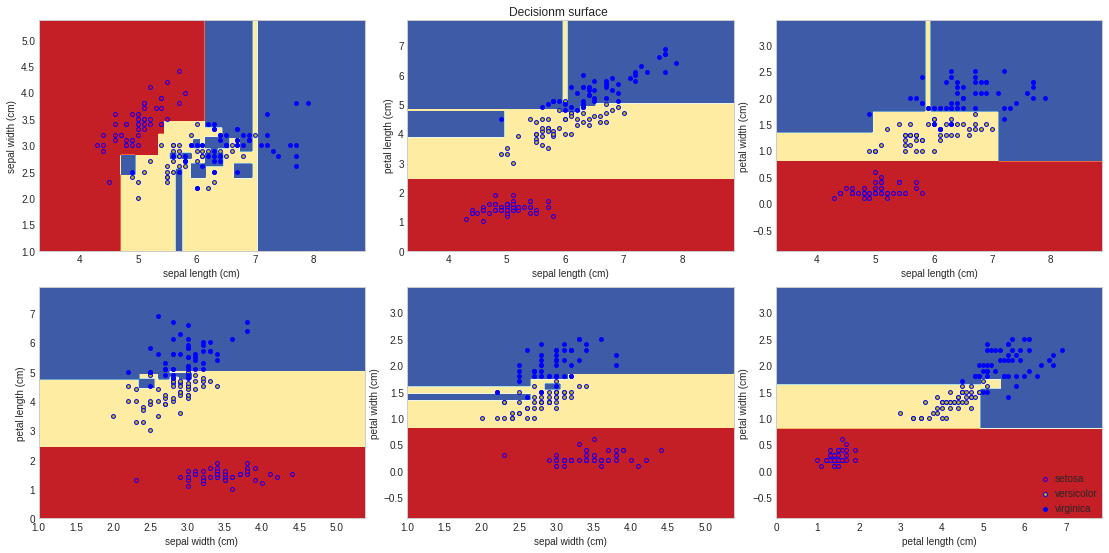

In [31]:
def make_meshgrid(x,y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2,3,pairidx + 1)

  xx, yy = make_meshgrid(X[:,0], X[:,1],plot_step)

  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  plot_contours(model, xx, yy, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1],c=color, label=iris.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
    
plt.suptitle('Decisionm surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                                [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target

  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X,y)

  plt.subplot(2,3,pairidx + 1)

  x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z , cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1],c=color, label=iris.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s=15)
    
plt.suptitle('Decisionm surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### DecisionTreeRegressor 회귀식 시각화

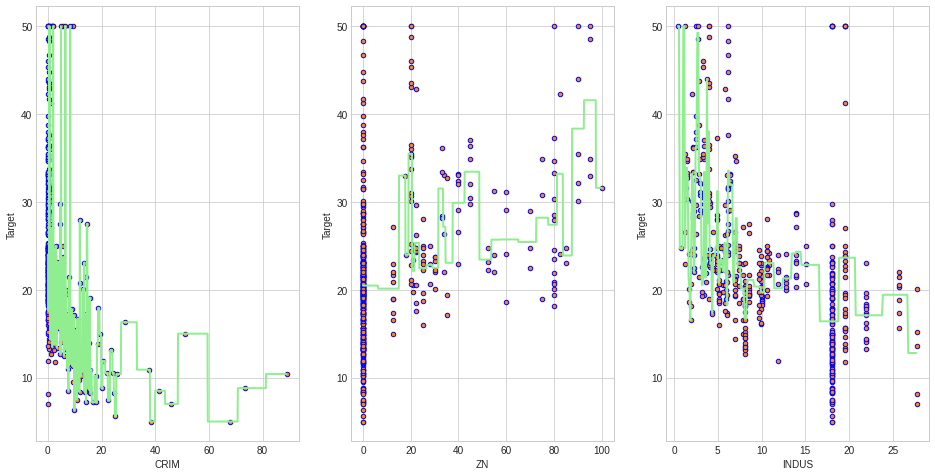

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:,pair].reshape(-1,1)
  y = boston.target

  model = DecisionTreeRegressor()
  model.fit(X,y)

  X_test = np.arange(min(X),max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1,3,pairidx+1)
  plt.scatter(X,y,s=20,edgecolor='b',
              c='darkorange',label='data')
  plt.plot(X_test,predict, color='lightgreen', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

하이퍼파리미터를 변경해 보면서 회귀식 시각화

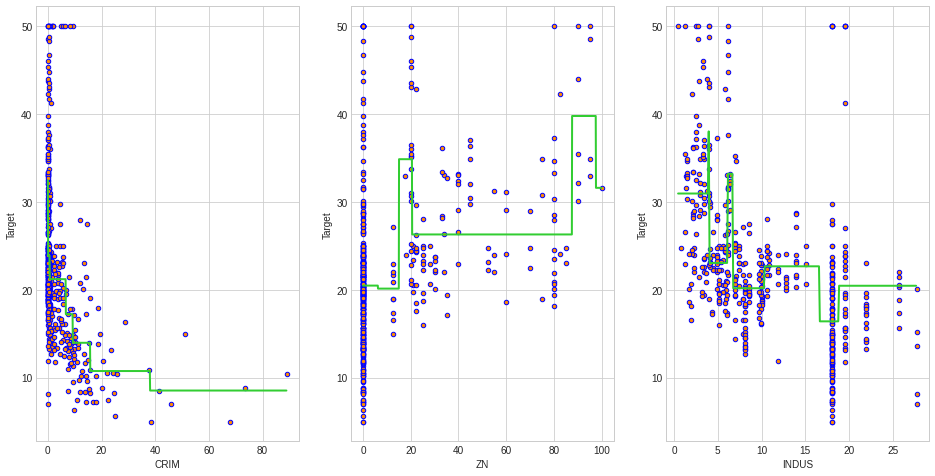

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:,pair].reshape(-1,1)
  y = boston.target

  model = DecisionTreeRegressor(max_depth=3)
  model.fit(X,y)

  X_test = np.arange(min(X),max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1,3,pairidx+1)
  plt.scatter(X,y,s=20,edgecolor='b',
              c='darkorange',label='data')
  plt.plot(X_test,predict, color='limegreen', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target') 

### 7.앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

#### ㄱ.(평균 방법)Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [ ]:
#분류 - Classifer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier() #SVC(), DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)
============================================================================================================

#회귀 - Regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor() #SVR(), DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

#### ㄴ.(평균 방법)Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

##### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
# Classifier(분류)
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

# Regressor(회귀)
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor())

cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5)

##### Extremely Randomized Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor 

# Classifier(분류)
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

# Regressor(회귀)
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

##### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [ ]:
from matplotlib.colors import ListedColormap

n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

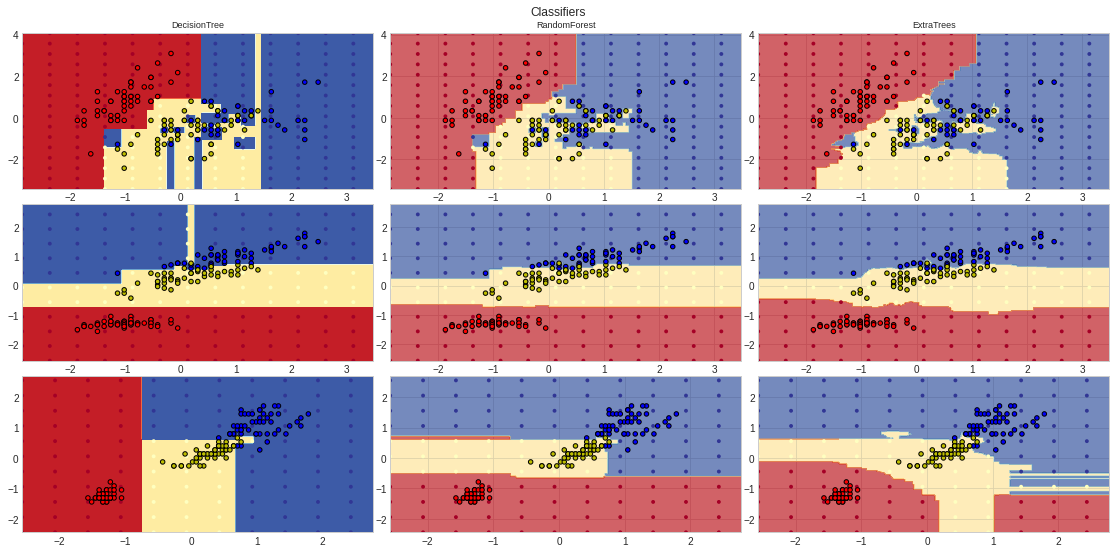

In [ ]:
# 결정 트리, Random Forest, Extra Tree 별 결정 경계 시각화

plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:

    X = iris.data[:,pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X,y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),
                         np.arange(y_min,y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z , cmap= cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z , alpha=estimator_alpha,cmap= cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:,0], X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

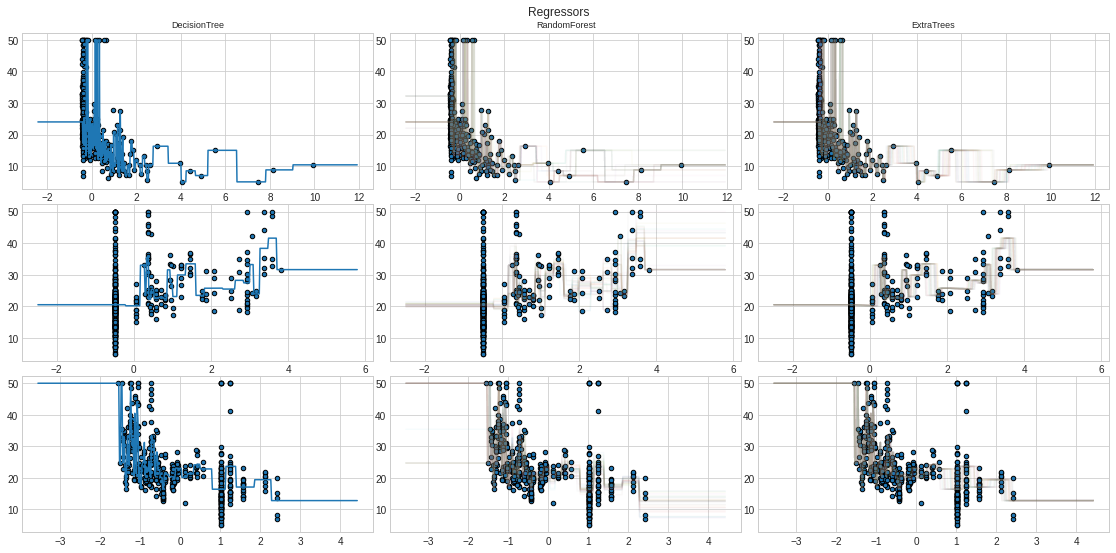

In [ ]:
# 결정 트리, Random Forest, Extra Tree 별 회귀식 시각화

plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

plt.figure(figsize=(16,8))

for pair in (0,1,2):
  for model in models:
    X = boston.data[:,pair]
    y = boston.target

    
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X.reshape(-1,1),y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1,x_max+1, plot_step), np.arange(y_min-1,y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx,Z , alpha=estimator_alpha)

    plt.scatter(X, y,edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Regressors', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

#### ㄷ.(부스팅 방법)AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

from sklearn.ensemble import AdaBoostRegressor

model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

#### ㄹ.(부스팅 방법)Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor())

cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5)

#### ㅁ.투표 기반 분류 

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

##### Voting Classifier

In [ ]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3)],
    voting='hard') # or 'soft'

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

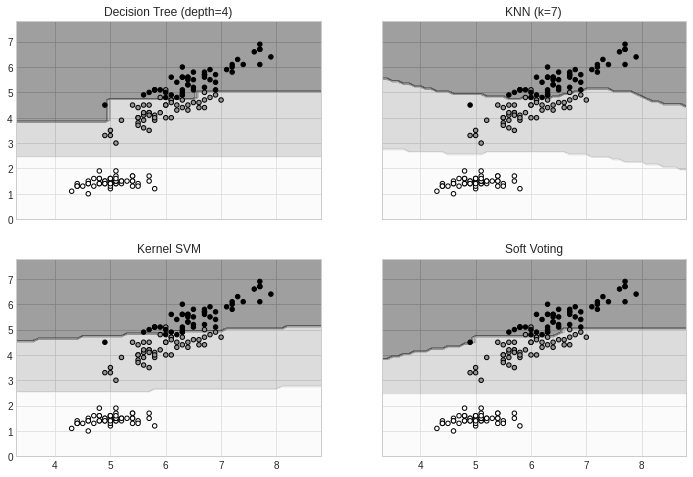

In [ ]:
# 결정 경계 시각화

from itertools import product 

make_meshgrid(X[:,0], X[:,1], h=0.1)

f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM','Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

##### Voting Regressor

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbe',model2),('rfr',model3)],
    weights=[1,1,1])

for model in (model1, model2,model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+- %0.5f) [%s]' % (scores.mean(),scores.std(),model_name))

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

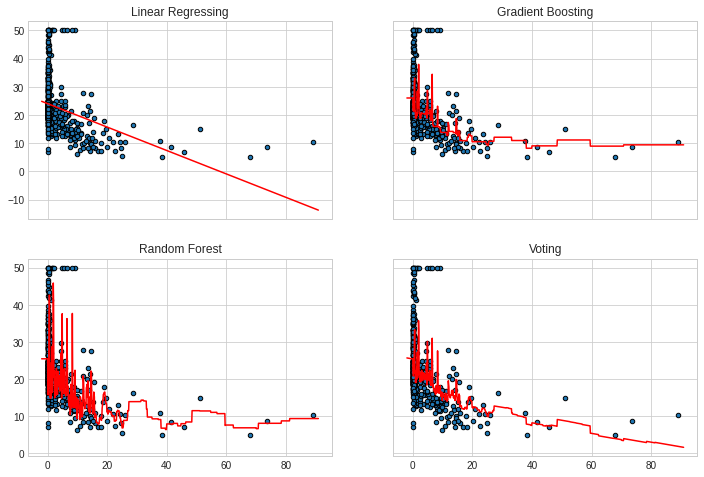

In [ ]:
# 회귀식 시각화

x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1,x_max+1, 0.1)

f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressing', 'Gradient Boosting',
                           'Random Forest','Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z , c='r')
  axarr[idx[0], idx[1]].scatter(X,y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### ㅂ.스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

##### 스택 분류

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingClassifier

estimators=[('logistic',LogisticRegression(max_iter=10000)),('svc',SVC()),('naive',GaussianNB())]

clf = StackingClassifier(
        estimators=estimators,
        final_estimator=RandomForestClassifier())

cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)

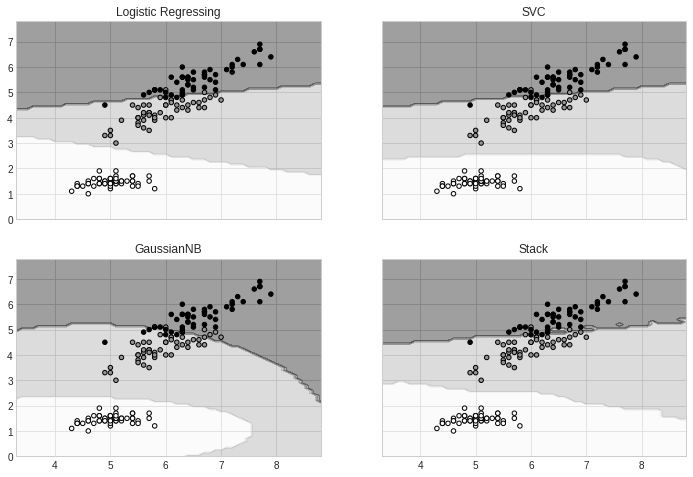

In [ ]:
# 결정 경계 시각화

X = iris.data[:,[0,2]]
y = iris.target

model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(estimators=estimators,
                           final_estimator=RandomForestClassifier())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

make_meshgrid(X[:,0], X[:,1], h=0.1)

f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regressing', 'SVC',
                           'GaussianNB','Stack']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

##### 스택 회귀

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor

estimators=[('ridge',Ridge()),('lasso',Lasso()),('svr',SVR())]

reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5
)

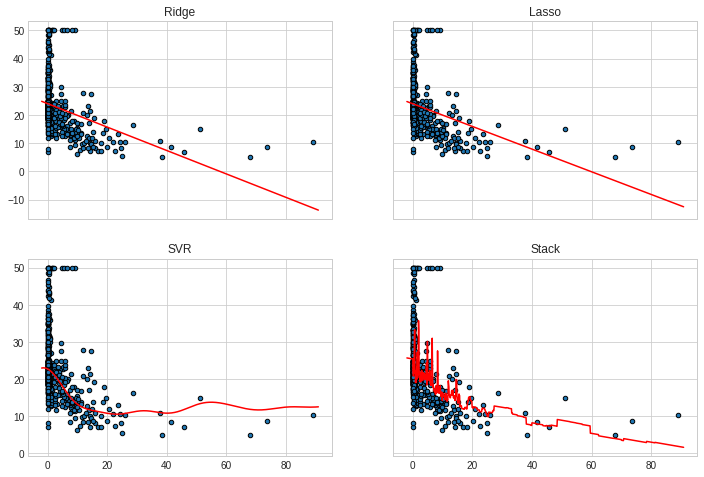

In [ ]:
# 회귀식 시각화
X = boston.data[:,0].reshape(-1,1)
y= boston.target

model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso',
                           'SVR','Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z , c='r')
  axarr[idx[0], idx[1]].scatter(X,y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 7.1 XGBoost, LightGBM

#### ㄱ.XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

##### 파이썬 기반 XGBoost
 * XGBoost는 속도 측면에서 C언어로 작성이 되어있다.
 * C언어를 파이썬 기반으로 동작할 수 있게 제공 된 함수

In [3]:
#파이썬 기반 XGBoost

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss', #손실함수 Binary Cross-Entropy(이진손실함수) / Log Loss
    'early_stopping':100
}
num_rounds = 15

evals = [(dtrain,'train'),(dtest,'eval')] #evaluate 평가
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds= 100, evals=evals)

[0]	train-logloss:0.609436	eval-logloss:0.610101
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540471	eval-logloss:0.540739
[2]	train-logloss:0.482113	eval-logloss:0.484899
[3]	train-logloss:0.433653	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.353717	eval-logloss:0.362107
[6]	train-logloss:0.322225	eval-logloss:0.329962
[7]	train-logloss:0.292921	eval-logloss:0.301791
[8]	train-logloss:0.267306	eval-logloss:0.278011
[9]	train-logloss:0.244087	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.240372
[11]	train-logloss:0.208073	eval-logloss:0.222709
[12]	train-logloss:0.191772	eval-logloss:0.207948
[13]	train-logloss:0.17746	eval-logloss:0.195312
[14]	train-logloss:0.164082	eval-logloss:0.184597


##### XGBClassifier, XGBRegressor
* skitit_leanr에서 제공된 함수

In [ ]:
# XGBClassifier
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train,y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

cross_val= cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)

# XGBRegressor
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train,y_train)
preds = xgbr.predict(X_test)

cross_val= cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)

##### feature_importance, graphviz 시각화

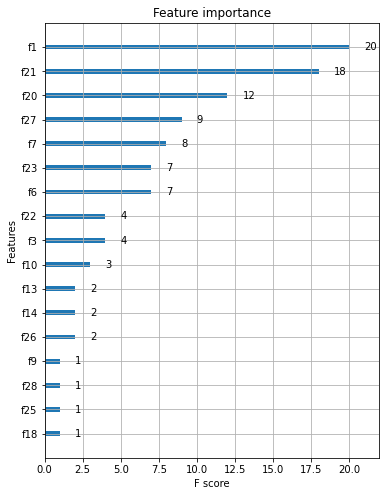

In [6]:
fig, ax = plt.subplots(figsize=(6,8))
plot_importance(xgb_model, ax=ax); #xgbc, xgbr

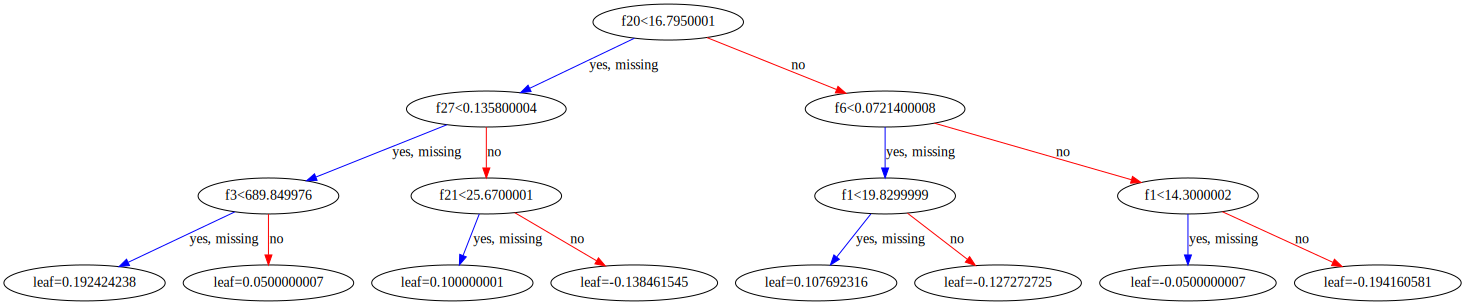

In [ ]:
dot_data = xgb.to_graphviz(xgb_model) #xgbc, xgbr
graph = graphviz.Source(dot_data)
graph

#### ㄴ.LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* `범주형 특징`의 자동 변환과 최적 분할

In [7]:
from lightgbm import LGBMClassifier,LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

##### LGBMClassifier, LGBMRegressor

In [9]:
# LGBMClassifier

lgbmc = LGBMClassifier(n_estimators=15)
evals = [(X_test, y_test)]
lgbmc.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmc.predict(X_test)

cross_val= cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

[1]	valid_0's multi_logloss: 0.997777	valid_0's multi_logloss: 0.997777
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.895442	valid_0's multi_logloss: 0.895442
[3]	valid_0's multi_logloss: 0.809103	valid_0's multi_logloss: 0.809103
[4]	valid_0's multi_logloss: 0.732391	valid_0's multi_logloss: 0.732391
[5]	valid_0's multi_logloss: 0.669225	valid_0's multi_logloss: 0.669225
[6]	valid_0's multi_logloss: 0.608976	valid_0's multi_logloss: 0.608976
[7]	valid_0's multi_logloss: 0.557876	valid_0's multi_logloss: 0.557876
[8]	valid_0's multi_logloss: 0.513242	valid_0's multi_logloss: 0.513242
[9]	valid_0's multi_logloss: 0.470866	valid_0's multi_logloss: 0.470866
[10]	valid_0's multi_logloss: 0.437898	valid_0's multi_logloss: 0.437898
[11]	valid_0's multi_logloss: 0.403873	valid_0's multi_logloss: 0.403873
[12]	valid_0's multi_logloss: 0.375711	valid_0's multi_logloss: 0.375711
[13]	valid_0's multi_logloss: 0.348203	valid_0's multi_logloss: 0.3482

In [19]:
# LGBMRegressor
lgbmr = LGBMRegressor(n_estimators=15)
evals = [(X_test, y_test)]
lgbmr.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmr.predict(X_test)

cross_val= cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
Did not meet early stopping. Best iteration is:
[15]	valid_0's l2: 26.0862


##### 시각화

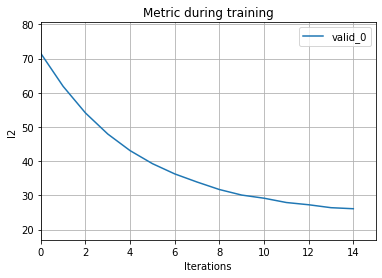

In [20]:
plot_metric(lgbmc); #lgbmr

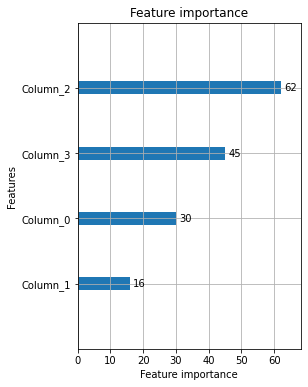

In [16]:
plot_importance(lgbmc, figsize=(4,6)); #lgbmr

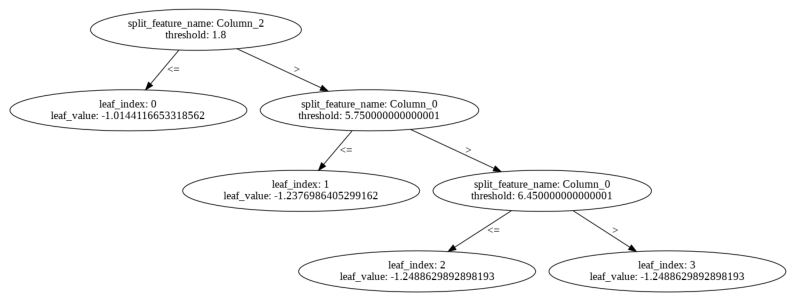

In [18]:
plot_tree(lgbmc, figsize=(14,10)); #lgbmr

### 8.군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘


![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

#### ㄱ.

#### ㄴ.

#### ㄷ.

#### ㄹ.

#### ㅁ.

#### ㅅ.

#### ㅇ.

#### ㅈ.

#### ㅊ.